In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

sns.set(style = 'white')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
#df = pd.read_csv('Telecom_Churn_Dataset.csv')
# load dataset
churn_data = pd.read_csv('churn_data.csv')


In [5]:
telecom = churn_data.copy()

In [6]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


## Data Understanding
### Classification Label
Churn ==> Whether the customer churned or not (Yes or No)

### Services Each Customer Has to Sign Up
1. PhoneService
2. MultipleLines
3. InternetService
4. OnlineSecurity
5. OnlineBackup
6. DeviceProtection
7. TechSupport
8. StreamingTV
9. StreamingMovies

### Customer Account Information
1. Tenure
2. Contact
3. PaperlessBilling
4. PaymentMethod
5. MonthlyCharges
6. TotalCharges

### Customer Demographic Info
1. customerid
2. gender
3. seniorcitizen
4. partner
5. dependents

In [19]:
# make all column names lowercase
telecom.columns = map(str.lower, telecom.columns)
telecom.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [20]:
telecom.shape

(7043, 21)

In [21]:
telecom.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No


In [22]:
def print_dataframe_info(telecom):
    # Print number of rows in DF
    print(f"Rows: {telecom.shape[0]} \n")
    
    # Print number of features in DF
    print(f"Features: {telecom.shape[1]} \n")
    
    # Print total number of missing values
    print(f"Missing Values: {telecom.isnull().values.sum()} \n")
    
    # Print number of unique values per feature
    print(f"Unique Values: \n{telecom.nunique()} \n")

# Call the function with my DataFrame
print_dataframe_info(telecom)

Rows: 7043 

Features: 21 

Missing Values: 0 

Unique Values: 
customerid          7043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64 



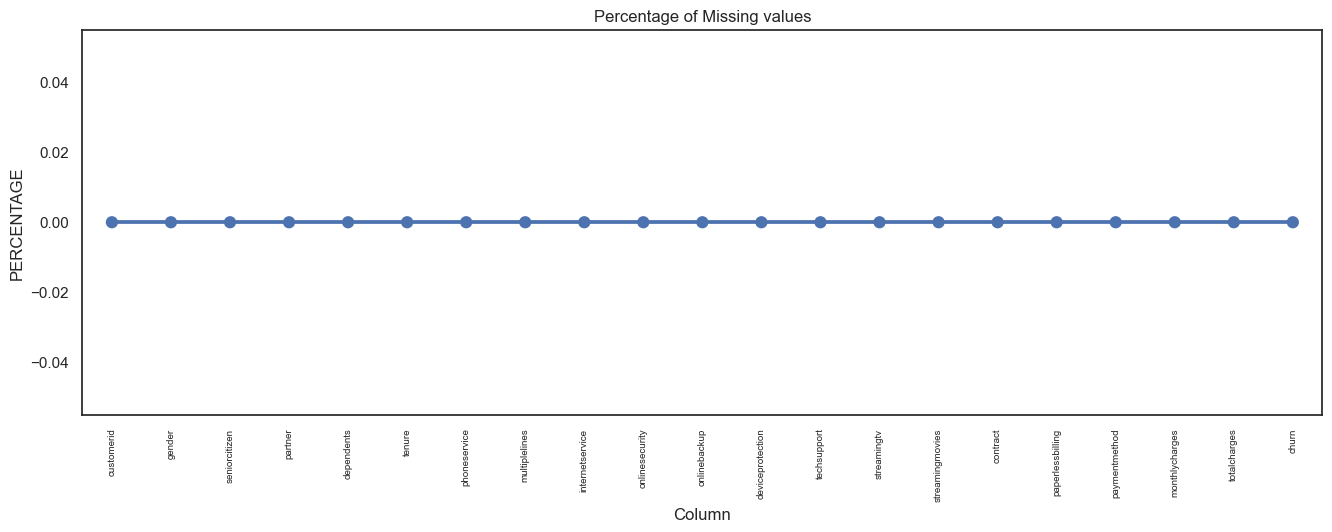

In [23]:
missing = pd.DataFrame((telecom.isnull().sum()) * 100 / telecom.shape[0]).reset_index()
missing.columns = ['Column', 'Missing_Percentage']

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Missing_Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

from the figure, here have no missing value

In [24]:
telecom[telecom.duplicated()].shape[0]

0

In [25]:
telecom.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

There seems to be an issue with the data type in the TotalCharges column; it should be a float rather than an object. We'll need to convert it to a float.

In [26]:
# Converting Total Charges to a numerical data type.
telecom.totalcharges = pd.to_numeric(telecom.totalcharges, errors='coerce')

NOTE: When we use errors='coerce', it means that if pandas encounters any errors while converting the data, it will set the problematic entries to NaT (Not a Time) for datetime conversions or NaN (Not a Number) for other conversions, and continue processing the rest of the data without raising an error.

In [27]:
# Statistic descriptive
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
monthlycharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750
totalcharges,7032.000,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800


We can take a decesion from above description:

1. SeniorCitizen has minimum value is 0 and the maximum value is 1, so it must be categorical data.
2. The average customer stayed in the company is 32 months and 75% of customer has a tenure of 55 month
3. Average monthly charges are USD 64.76 and 75% of customers pay less than maximum charge of 118.750 USD
4. The total average charges is 7032.00 USD. The range of total charges is 18.80 to 8684.80 USD

### Check null values

In [28]:
features_na = [feature for feature in telecom.columns if telecom[feature].isnull().sum() > 1]

for feature in features_na:
    print(f"{feature}, {round(telecom[feature].isnull().mean(), 4)} % Missing values")

totalcharges, 0.0016 % Missing values


In [29]:
# Check observation of missing values

telecom[telecom[features_na[0]].isnull()]
#telecom[telecom["totalcharges"].isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350,NaN,No


At the above dataset, we see that there are 11 missing values for Total Charges. Let us remove all of these 11 rows from our dataset

In [30]:
# drop missing values
telecom.dropna(inplace=True)

# drop customerID 
telecom.drop('customerid', axis=1, inplace=True)

In [31]:
telecom.totalcharges.isnull().sum()

0

In [32]:
telecom.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

<Axes: >

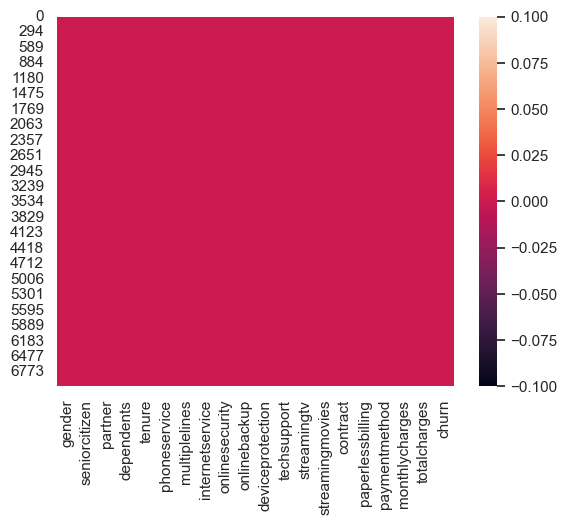

In [33]:
# heatmap for missing value
sns.heatmap(telecom.isnull())

In this dataset, there have no any missing value

### Check Unique Values

In [34]:
#tele= telecom.columns.tolist()
#for i in tele:
    #print(i, "unique value:", telecom[i].unique())
    #print(f"{i} unique value: {telecom[i].unique()}")


# to check unique value without int or float in dataset
def print_non_numeric_unique_values(telecom):
    for col in telecom.columns.tolist():
        if telecom[col].dtype != 'int64' and telecom[col].dtype != 'float':
            print(f'{col} \t\t: {telecom[col].unique()} , (Total: {len(telecom[col].unique())})')

# Call the function with your DataFrame
print_non_numeric_unique_values(telecom)

gender 		: ['Female' 'Male'] , (Total: 2)
partner 		: ['Yes' 'No'] , (Total: 2)
dependents 		: ['No' 'Yes'] , (Total: 2)
phoneservice 		: ['No' 'Yes'] , (Total: 2)
multiplelines 		: ['No phone service' 'No' 'Yes'] , (Total: 3)
internetservice 		: ['DSL' 'Fiber optic' 'No'] , (Total: 3)
onlinesecurity 		: ['No' 'Yes' 'No internet service'] , (Total: 3)
onlinebackup 		: ['Yes' 'No' 'No internet service'] , (Total: 3)
deviceprotection 		: ['No' 'Yes' 'No internet service'] , (Total: 3)
techsupport 		: ['No' 'Yes' 'No internet service'] , (Total: 3)
streamingtv 		: ['No' 'Yes' 'No internet service'] , (Total: 3)
streamingmovies 		: ['No' 'Yes' 'No internet service'] , (Total: 3)
contract 		: ['Month-to-month' 'One year' 'Two year'] , (Total: 3)
paperlessbilling 		: ['Yes' 'No'] , (Total: 2)
paymentmethod 		: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] , (Total: 4)
churn 		: ['No' 'Yes'] , (Total: 2)


At the payment method, The word "(automatic)" must be deleted because when we visualize it will take more space which is very unnecessary.

In [35]:
#df["PaymentMethod"] = df["PaymentMethod"].str.replace(" (automatic)", "", regex=False)
telecom['paymentmethod'] = telecom['paymentmethod'].str.replace(" (automatic)", "", regex = False)

In [36]:
telecom['paymentmethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

### Visualisation

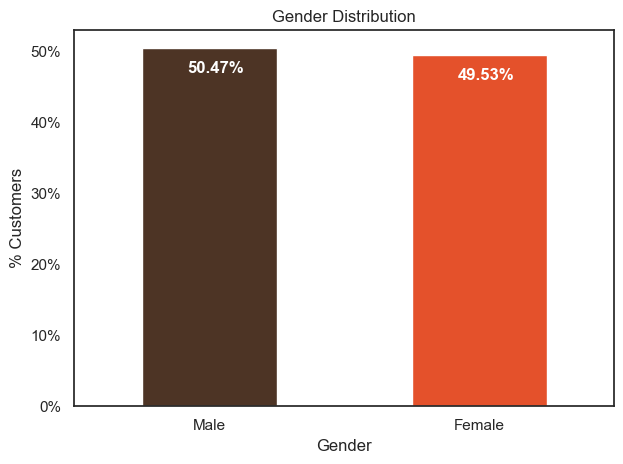

In [37]:
gender_percentage= telecom['gender'].value_counts()*100.0 /len(telecom)
ax = gender_percentage.plot(kind='bar', stacked = True, rot = 0, color = ['#4D3425','#E4512B'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax.set_ylabel('% Cusstomers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
#totals = []



# find the values and append to list
#for i in ax.patches:
    #totals.append(i.get_width())

# set individual bar lables using above list
#total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.17, i.get_height()-3.5, 
            str(round(i.get_height(), 2))+'%',
            #str(round((i.get_height()/total), 1))+'%'
            fontsize=12,
            color='white',
           weight = 'bold')

# Adjust the plot margins to ensure all labels are visible
plt.tight_layout()



In [51]:
# Examine the distribution of TotalCharges
telecom.totalcharges.describe()

count   7032.000
mean    2283.147
std     2264.703
min       18.800
25%      397.800
50%     1394.575
75%     3791.250
max     8550.000
Name: totalcharges, dtype: float64

In [62]:
#find the 80th percentile of the data in total charges
telecom.totalcharges.quantile(0.8)

4466.89

In [63]:
telecom.totalcharges = telecom.tenure * telecom.monthlycharges

In [64]:
telecom[telecom.tenure * telecom.monthlycharges != telecom.totalcharges].shape

(0, 20)

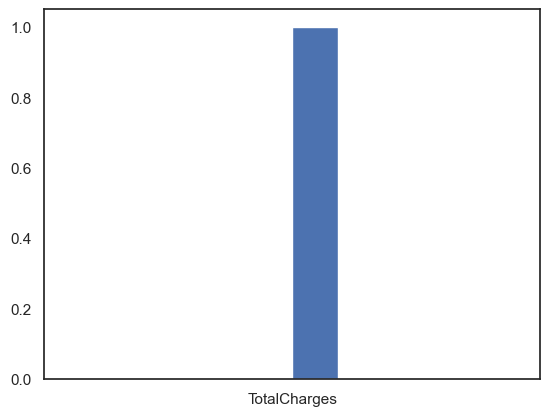

In [65]:
# Examine the distribution of TotalCharges
plt.hist(data = telecom, x = 'TotalCharges');

In [54]:
telecom.tenure.describe()

count   7032.000
mean      32.422
std       24.545
min        1.000
25%        9.000
50%       29.000
75%       55.000
max       72.000
Name: tenure, dtype: float64

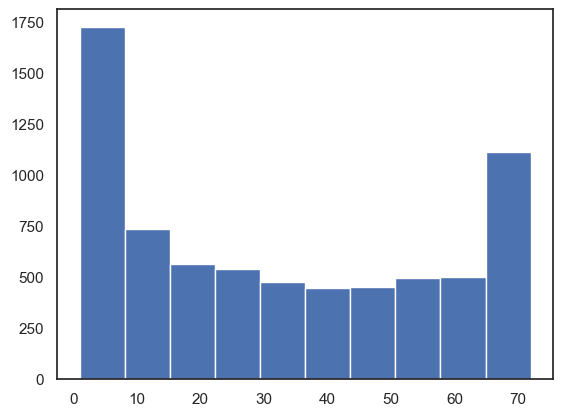

In [60]:
# show the distribution of tenure.
plt.hist(data = telecom, x = 'tenure');

In [58]:
telecom.query('phoneservice == "No"').shape

(680, 20)

In [59]:
def desc(title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    if title:
        plt.title(title);
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks1:
        plt.xticks(xticks1, xticks2);
    if yticks1:
        plt.yticks(yticks1, yticks2);
    if legend_title:
        plt.legend(title=legend_title);
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels);